# Práctica 1

Autor: Blanca Cano Camarero  DGIIM  
Grupo: 2  
Fecha: Octubre 2021  


In [2]:
'''
Esta celda contiene: 
1. Bibliotecas necesarias.
2. Indicación de la ruta de donde se toman las imágenes.
3. Conjunto de funciones auxiliaras como las utilizadas para mostrar imágenes en pantalla. 
Estas están tomadas de la práctica 0 y a lo sumo tienen ligeras modificaciones.  
'''
# Configuración previa 
# 1 modulos utilizados
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

# ____ Display test ___
TESTS_ON = True

# ___ Lectura de imágenes___
# path carpeta con imágenes
path = 'imagenes/'

# Reutilizamos código de la práctica inicial
def ReadImage(filename, flagColor):
  '''
  @param filename: nombre de la foto 
  @para flagColor: boolean escala de grises o color
  '''
  return cv.imread(filename, flagColor)
## Flags
flagColor = cv.IMREAD_ANYCOLOR
flagGrey = cv.IMREAD_GRAYSCALE

# Path de las imágenes
path_bicycle = path + 'bicycle.bmp'
path_bird = path + 'bird.bmp'
path_cat = path + 'cat.bmp'

# Leemos las imágenes
img_bicycle = ReadImage(path_bicycle, flagColor)
img_bicycle_grey = ReadImage(path_bicycle, flagGrey)
img_bird = ReadImage(path_bird, flagColor)
img_bird_grey = ReadImage(path_bird, flagGrey)
img_cat = ReadImage(path_cat, flagColor)
img_cat_grey = ReadImage(path_cat, flagGrey)


# Devuelve si una imagen está en blanco o negro 
def IsGreyScale(img):
    '''Devuelve si una imagen está en blanco y negro'''
    return len(img.shape) == 2

# Para pintar imágenes
def Normalize (img):
    ''' Transforma una imagen de números reales
    al intervalo [0,1] 
    '''
    min = np.min(img)
    max = np.max(img)

    normalized_img = np.copy(img)

    if max - min > 0:
        normalized_img = (normalized_img - min) / (max - min)
    else: 
        normalized_img *= 0 # suponemos todo blanca
    return normalized_img

def PrintOneImage( img, title=None, normalize= True, size = (13,13)):
    '''Muestra una imagen usando imshow'''

    plt.figure(figsize=size)
    if normalize:
        img = Normalize(img)
    if IsGreyScale(img):
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img[:,:,::-1])
    if title:
        plt.title(title)
    plt.show()




''' utilizar la convolución 
# https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
'''
def Convolution1D(f, g): 
    ''' 
    Esta función calcula la convolución de g con f 
    f array 
        g kernel de convolución
    '''
    mask_length = len(g)
    g_inv = g[::-1]
    bound_array = np.zeros(len(g) -1)
    expanded_f = np.concatenate( (bound_array, f, bound_array)) 
    convoluted_f = np.zeros( len(expanded_f)- mask_length +1) 

    for i in range( len(expanded_f) - mask_length +1):
        convoluted_f[i] = sum([ expanded_f[i+j]*m for j,m in enumerate(g_inv) ])

    return convoluted_f


def RangoK (k: int):
    ''' dato k >= 0 devuelve [-k, -k+1, ...k-1, k]'''
    return list(range(-k, k+1))
def SacaRangoMascara(m):
    ''' Dada una máscata m, deduce su rango centrado
        Función auxiliar para representar máscaras
    '''
    return RangoK( (len(m)-1) // 2)
# Función para mostrar una máscara 
def MuestreaMascara( mascara:list, title = None,color= '--o'):
    dominio = RangoK((len(mascara)-1)//2)
    plt.plot(dominio, mascara, color)
    if (title):
        plt.title( title)
    plt.show()

# Función para comparar máscaras usando la norma euclídea
def DistanciaEuclidea (m1:np.array, m2:np.array)->float: 
    return np.linalg.norm(m1-m2)

# Función para mostrar dos máscaras 
### Comparamos las máscaras   
def MuestraDosMascaras ( m1, m2, title= None, title1 = None, title2 = None):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    if(title):
        fig.suptitle(title)
    # calculamos máscara 1
    r1 = SacaRangoMascara(m1)
    ax1.plot(r1, m1, '--o')
    if(title1):
        ax1.set_title( title1)
    # calculamos máscara 2
    r2 = SacaRangoMascara(m2)
    ax2.plot(r2, m2, '--x')
    if(title2):
        ax2.set_title(title2)
    fig.tight_layout()
    plt.show()

def PrintTwoImages(v_imagenes, v_titulos, titulo_principal):
    '''
    '''
    fig, axs = plt.subplots(1,2, figsize=(15,15))
    for i, img in enumerate(v_imagenes):
        if IsGreyScale(img):
            axs[i].imshow(img, cmap='gray')
        else:
            axs[i].imshow(img[:, :, ::-1])
        axs[i].set_title(v_titulos[i])

    fig.suptitle(titulo_principal)
    fig.tight_layout() # Para que no se solapen los subtítulos
   
    plt.show()
    plt.clf()


def UneImagenes(vim):

    num_imagenes = len(vim)

    alturas = []

    for i in range(0, num_imagenes):
        alturas.append( vim[i].shape[0])

    altura_maxima = np.max( alturas )

    # cogemos la primera imagen normalizada
    imagen_final = Normalize(vim[0])

    if imagen_final.shape[0] < altura_maxima:
        filas_restantes = altura_maxima - vim[0].shape[0]
        franja_negra = np.ones( (filas_restantes, vim[0].shape[1]))
        franja_negra = Normalize(franja_negra)
        imagen_final = np.vstack((imagen_final, franja_negra ))


    for i in range(1, num_imagenes):
        # para las siguientes imagenes, las normalizamos
        img = Normalize(vim[i])

        # si les faltan filas, añadimos las restantes como un borde negro
        if img.shape[0] < altura_maxima:
            filas_restantes = altura_maxima - img.shape[0]
            franja_negra = np.ones( (filas_restantes, img.shape[1]))
            franja_negra = Normalize(franja_negra)
            img = np.vstack((img, franja_negra ))

        imagen_final = np.hstack((imagen_final, img))

    return imagen_final

def PrintMultiplesImagenes(imagenes, titulo=None):
    """ Pinta múltiples imágenes"""
    fusion = UneImagenes(imagenes)
    PrintOneImage(fusion, titulo)


def PintaMultiplesImagenesConTitulos(v_img:list, titulos: list, columnas :int, filas:int ):
    '''Representa varias imágenes en una misma ventana
    Filas. 
    Debe de ser mayor de dos por dos 
    Suponemos:
        columnas * filas > len(v_img)
    '''
    # Gestionamos columanas y filas 
    numero_imagenes = len(v_img)
    # Preparamos grid
    fig, axs = plt.subplots(columnas, filas)

    for i in range(numero_imagenes):
        # pasamos a tribanda si está en monobanda
        if len(v_img[i].shape) != 3: 
            v_img[i] = cv.cvtColor(v_img[i], cv.COLOR_GRAY2RGB)
        # Calculamos posición en el grid
        x = i % columnas
        y = i // filas
        axs[x,y].imshow(v_img[i][:,:,::-1])
        
        # Añadimos título si lo tiene  
        if type(titulos)==list and len(titulos)>i:
            axs[x,y].set_title(titulos[i])
            
    fig.tight_layout() # Para que no se solapen los subtítulos
   
    plt.show()
    plt.clf()


# Compara imágenes 
def ComparaImagenes( img1, img2, titulo):
    '''Normaliza dos imágenes y las muestra en pantalla'''
    img1 = Normaliza(img1)
    img2 = Normaliza(img2)
    titulo_imagen = 'Imagen diferencia '
    if(titulo):
        print(f'\n{titulo}')
        titulo_imagen += titulo
    print('Error cuadrático de las imagenes',  MSE(img1, img2))
    # Ponemos como valos absoluto para que se la diferencia sea real
    diferenciaImagenes = abs(img1- img2)
    print('Vamos a restar los píxeles de los imágenes para ver la diferencias entre ellas')
    print('La imagen normalizada resultante es: ')
    
    PrintOneImage(diferenciaImagenes, 'Imagen diferencia',normalize=False)
    print('Recuerde de que las zonas más oscuras significan una diferencia pequeña, siendo el color negro la igualdad')


# Ejercicio 1 
USANDO SOLO FUNCIONES BÁSICAS DE OPENCV, escribir funciones Python que implementen de forma eficiente el cálculo de los siguientes puntos. 

## Ejercicio 1A

Considere la función Gaussiana 1D de media 0 y desviación típica σ.   
Calcular las máscaras discretas 1D de la función Gaussiana,  la derivada de la Gaussiana y la segunda derivada de la Gaussiana.   

ea función implementada debe considerar que tanto el valor de σ como el tamaño
de la máscara son posibles entradas alternativas a la función.
Represente en ejes cartesianos las máscaras obtenidas como funciones 1D y  compare sus formas con las máscaras dadas por la función de OpenCV getDerivKernels para los mismos tamaños de máscara. Use los tamaños
5, 7 y 9.

### Solución  

#### 1 Cálculo de la máscara.  

A nivel teórico la construcción proviene de la discretización del kernel Gaussiano: 
Dada un pixel $x$ se tiene que su Gaussiana es:  

$$G(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{x^2}{2 \sigma^2}}$$  
 
Podemos notar que la función depende de la desviación típica $\sigma$, que conjunto a las propiedades
de la función se tiene que a mayor valor de $\sigma$:
- Menor valor en $G(0)$.
- Y recordemos que en una distribución normal, el $99.74%$ de los datos se encuentra a distancia menor que $3\sigma$. 

No resulta pues azaroso, que si para la discretización, debe tomarse nodos equiespaciados, 
el tamaño del array unidimensional de nuestra máscara 
venga dado por $T = 2 \lceil 3 \sigma \rceil + 1.$

Por simpleza computacional prescindiremos de constantes, ya que si el cómputo des de la forma
 $S = \sum_{i=-k}^k c G(k)$ podría sacarse factor común $c$. Sin embargo con el objetivo de no variar 
 la intensidad de la imagen se le aplicará un factor para normalizarlo (la constante obviada al principio). 

La derivada de la Gaussiana sería 
$$\frac{d G(x)}{dx} = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{x^2}{2\sigma^2}}(-\frac{x}{\sigma^2})$$
Que obviando las constantes quedaría 

$dG(x) = e^{-\frac{x^2}{2\sigma^2}}(-x)$ (notemos la antisimetría de la función)

La segunda derivada sin constantes quedaría : 
$e^{-\frac{x^2}{2\sigma^2}}\left(1-\frac{2x^2}{\sigma^2} \right)$ 

Para la implementación se ha multiplicado por constantes para conseguir el mínimo computacional. 

Para la comparación usaremos la función `cv2.getDerivKernels`

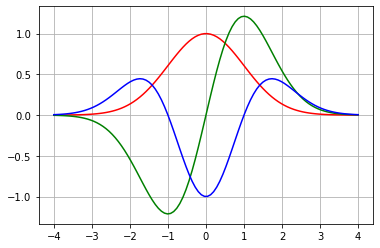

Téngase presente que la funciones están multiplicadas por un factor de escala


In [3]:
# Declaración de la Gaussiana y su derivada primera y segunda
def Gaussiana (x: float, desviacion_tipica : float) -> float :
    return np.exp( - x**2 /(2* desviacion_tipica**2))

def DerivadaPrimeraGaussiana (x: float, desviacion_tipica : float)->float :
    #return -(Gaussiana (x, desviacion_tipica)* 2*x)
    return Gaussiana (x, desviacion_tipica)* 2*x

# Nota:para la primera derivada se toma sin pérdida de generalidad su versión positiva
# No afecta esta transformación porque su importancia como filtro es de detectar 
# cambios de intensidad, independientemente de que sean, negativos o positivos

def DerivadaSegundaGaussiana (x: float, desviacion_tipica : float)->float:
    return Gaussiana(x, desviacion_tipica) * ( x**2 - desviacion_tipica**2 )

# Con el objetivo de tener una idea intuitiva de la máscara vamos a visualizarla: 

# Rango de valores sobre los que se visualizará
inferior = -4
superior = 4
puntos = 100
colores=['r', 'g', 'b']
x_valores = np.linspace(inferior, superior, puntos)
FUNCIONES = [Gaussiana, DerivadaPrimeraGaussiana, DerivadaSegundaGaussiana]

sigma = 1.0
# Relizamos los mapeos de los valores
y_valores = list([f(x_valores, sigma) for f in FUNCIONES])

# Mostramos los valores usando matplotlib
# Mostramos Gráfico con las funciones que queremos discretizar
fig, ax = plt.subplots()
ax.grid(True, which='both')
list( map(lambda x: plt.plot(x_valores, x[0],x[1]), zip(y_valores, colores)))
plt.show()

print('Téngase presente que la funciones están multiplicadas por un factor de escala')
 


Procedemso a visualizar las máscaras
____Máscara gaussiana de orden 0___
Máscara Gaussiana


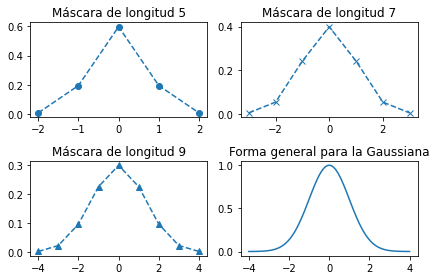

Comparativa con getDerivKernels


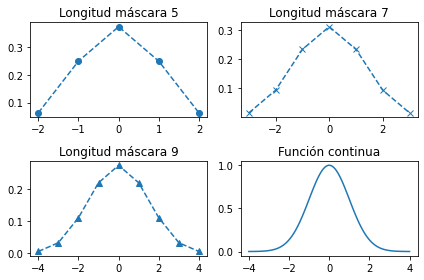

____Máscara gaussiana de orden 1___
Máscara Gaussiana primera derivada


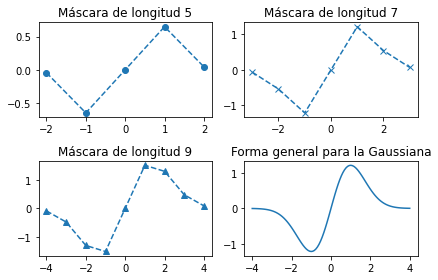

Comparativa con getDerivKernels


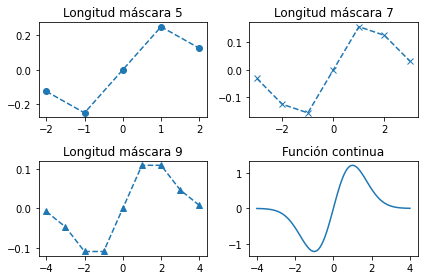

____Máscara gaussiana de orden 2___
Máscara Gaussiana segunda derivada


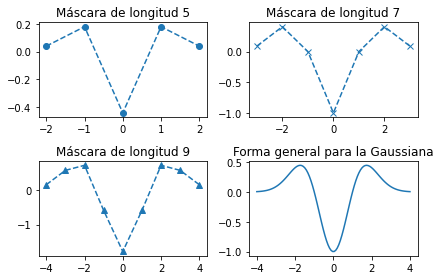

Comparativa con getDerivKernels


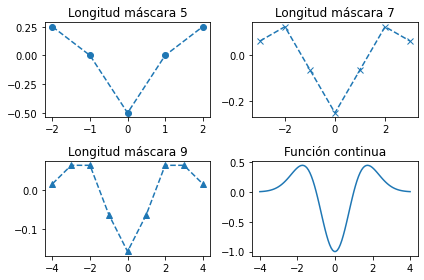

In [4]:
# Implementación de las máscaras

# Comenzaremos definiendo funciones auxiliares: 

# Declaración de las funciones para calcular la máscara de tamaño T
def Mascara( f, size:int ):
    ''' Función auxiliar que devuelve estrictamente la máscara
        Devuelve la máscara de f de tamaño size 
        Requisito: size debe ser impar. 
    '''
    k = (size -1)//2
    return [f(i) for i in range(-k,k+1)]

# Definimos ahora las máscaras de la Gaussiana y sus derivadas, 
# Todavía dependen de la desviación típica y el tamaño de máscara, se generalizarán más adelante.
def MascaraGaussiana( desviacion_tipica:float, size:int)-> list:
    '''Máscara Gaussiana de tamaño "size"
    Requisito size debe ser impar 
    '''
    mascara_sin_normalizar = np.array(
        Mascara(lambda x: Gaussiana(x, desviacion_tipica), size),
        np.float64)
    suma = sum(mascara_sin_normalizar)
    return mascara_sin_normalizar/suma

def MascaraDerivadaPrimera(desviacion_tipica:float , size:int)->list:
    mascara_sin_normalizar =  np.array(
        Mascara(lambda x: DerivadaPrimeraGaussiana(x, desviacion_tipica), size),
        np.float64
    )
    return mascara_sin_normalizar

def MascaraDerivadaSegunda(desviacion_tipica:float , size:int)->list:
    mascara_sin_normalizar =  np.array(
        Mascara(lambda x: DerivadaSegundaGaussiana(x, desviacion_tipica), size),
        np.float64
    )
    return mascara_sin_normalizar
MASKS_LIST = [MascaraGaussiana, MascaraDerivadaPrimera,MascaraDerivadaSegunda]

#La funciones creadas dependen de la desviación típica y del tamaño de la máscara. 
#Con el fin de hacerlas menos restrictivas en virtud de la relación T = 2 ceil(3 sigma) +1, 
#despejando T y sigma respectivamente obtenemos

def DeductSizeTFromSigma(sigma:float)-> int:
    ''' Calcula tamaño de másacara a partir de sigma'''
    return int(2* np.ceil(3*sigma) + 1)

def DeductSizeKFromSigma(sigma:float)-> int:
    ''' Calcula tamaño de másacara a partir de sigma'''
    return np.ceil(3*sigma)

def DeductSigmaFromT( T: int) -> float: 
    '''Ojo: se supone que 3 sigma = ceil(3sigma) = (T-1)/2'''
    return (T-1)/6.0

##### Implementación de la función general   
def MascarasGaussianasGeneral(orden : int, sigma: float =None, T: int = None) ->np.array: 
    '''Devuelve máscara de orden \in {0,1,2}
        Proporcionando sigma o T como dato, en  caso de que uno de ellos no sea dado lo deduce por 
        la relación ya mencionado
    '''
    # comprobación de que se cumplen las hipótesis
    assert 0<= orden <= 2
    assert sigma != None or T != None
    # Deducción pertinentes si son necesarias
    if( T == None):
        T = DeductSizeTFromSigma(sigma)
    elif(sigma == None):
        sigma = DeductSigmaFromT(T)

    return MASKS_LIST[orden](sigma, T)

##### Función para comparar máscaras de forma visual 
def ComparaMascaras (listaMascaras,rangos, nombres):
    ''' Muestra en pantalla una imagen tras otra de las máscaras'''
    for i,m in enumerate(listaMascaras): 
        plt.plot(RangoK(rangos[i]), listaMascaras)
        plt.title(nombres[i])
    plt.show()


def MSE(A:np.array,B:np.array)-> float:
    '''Error cuadrático medio
    Esta función se utilizará para comparar vectores de mismo tamaño
    '''
    return np.square(A-B).mean()

def ComparaMascarasAnalitico (m1:np.array, m2:np.array, title= None, title1 = None, title2 = None):
    # normalizamso 
    n_m1 = Normalize(m1)
    n_m2 = Normalize(m2)
    # calculamos error cuadrático medio
    mse_m1_con_m2 = MSE(n_m1, n_m2)
    print('El error cuadrático medio es ' , mse_m1_con_m2)
    MuestraDosMascaras ( n_m1, n_m2, title, title1, title2)


#####  Test
print('Procedemso a visualizar las máscaras')
lista_longitudes = [5,7,9]
colores = ['--o', '--x', '--^']
funciones = [
    {'funcion': MascaraGaussiana, 'nombre': 'Máscara Gaussiana', 'derivate order': 0},
    {'funcion': MascaraDerivadaPrimera, 'nombre': 'Máscara Gaussiana primera derivada', 'derivate order': 1},
    {'funcion': MascaraDerivadaSegunda, 'nombre': 'Máscara Gaussiana segunda derivada', 'derivate order': 2},
]
# Diccionarios donde guardaremso las máscaras para compararlas a posteriori
dict_mascaras = dict()
dict_mascaras_cv = dict()
for j,f in enumerate(funciones):
    print(f'____Máscara gaussiana de orden {j}___')
    mascara=f['funcion'] 
    print(f['nombre'])
    fig, ax = plt.subplots(2,2)

    # creamos entrada de las máscara de orden j
    dict_mascaras[j] = dict()
    # Mis máscaras
    for i,l in enumerate(lista_longitudes):
        # Calculamos máscara
        a =  MascarasGaussianasGeneral(orden=j,T=l)
        # Creamos gráfico asociado
        b = RangoK(l//2)
        ax[i//2, i%2].plot(b, a, colores[i], label=f'k={l//2}')
        ax[i//2, i%2].set_title(f'Máscara de longitud {l}')
        # guardamos la máscara 
        dict_mascaras[j][l] = a
    # Añadimos al gráfico gaussiana de orden j (la función continua)
    ax[1,1].plot(x_valores, y_valores[j])
    ax[1,1].set_title('Función continua')
    plt.title('Forma general para la Gaussiana')
    fig.tight_layout()
    plt.show()

    # Máscara opencv

    dict_mascaras_cv[j] = dict()
    print('Comparativa con getDerivKernels')
    fig, ax = plt.subplots(2,2)
    for i,l in enumerate(lista_longitudes):
        a = cv.getDerivKernels(j,1,ksize=l, normalize = True)[0]
        b = RangoK(l//2)
        ax[i//2, i%2].plot(b, a, colores[i], label=f'cv.getDerivKernels de longitud={l//2}')
        ax[i//2, i%2].set_title(f'Longitud máscara {l}')
        # guardamos la máscara 
        dict_mascaras_cv[j][l] = a
    ax[1,1].plot(x_valores, y_valores[j])
    ax[1,1].set_title('Función continua')
    fig.tight_layout()
    plt.show()


    


# Conclusiones  
A la vista de las imágenes está claro que ambas funciones, a pesar de ser diferentes aproximan a la función continua. 

Es totalmente lícito preguntarse cuál es mejor  como aproximación y cuál es el error entre ellas. 

Para la primera cuestión, puesto que los nodos toman el valor exacto de la función $G$ y aumentar la densidad de nodos nos aseguraría la convergencia; eligiremos como mejor aproximación la primera.  
(Podría haberse optado por enfoque más exhaustivo analizándose la diferencia de áreas entre la aproximación y la función continua)- 

Para comparar el error entre las máscaras haremos uso del erro cuadrático medio de los nodos, antes además normalizaremos los valores de las máscaras para poder compararlos mejor
los resultado son los siguientes: 

Comparación de orden 0 de longitud 5
El error cuadrático medio es  0.2966051368273944


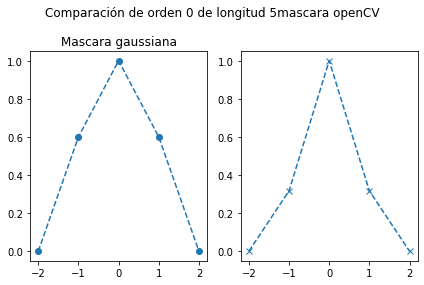

Comparación de orden 0 de longitud 7
El error cuadrático medio es  0.26804693341066704


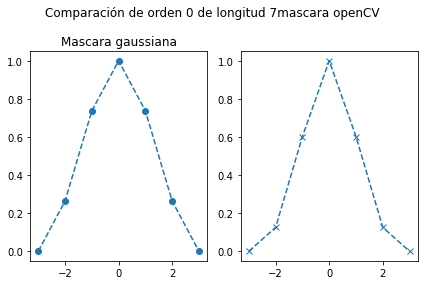

Comparación de orden 0 de longitud 9
El error cuadrático medio es  0.2592060000234483


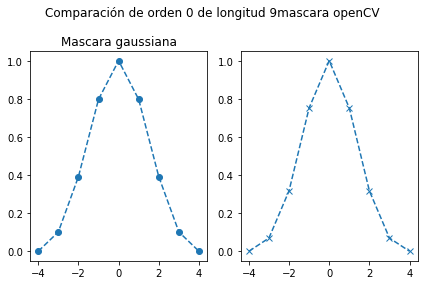

Comparación de orden 1 de longitud 5
El error cuadrático medio es  0.22546835184831646


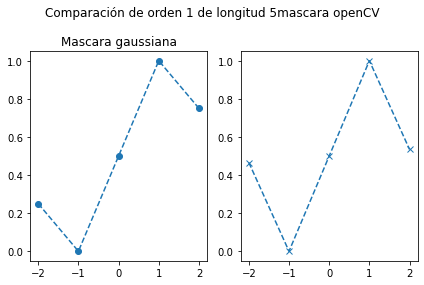

Comparación de orden 1 de longitud 7
El error cuadrático medio es  0.20586910026742708


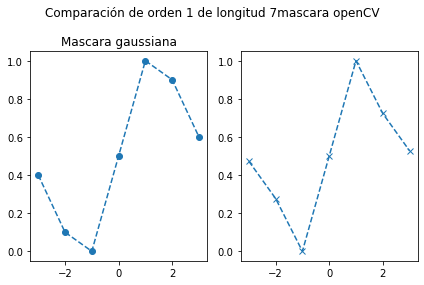

Comparación de orden 1 de longitud 9
El error cuadrático medio es  0.224008196496698


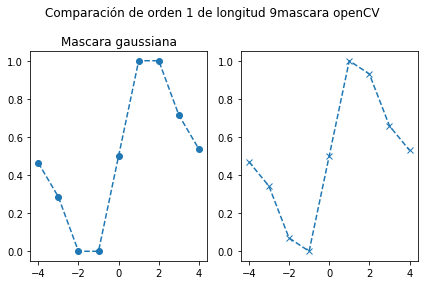

Comparación de orden 2 de longitud 5
El error cuadrático medio es  0.27132203865501636


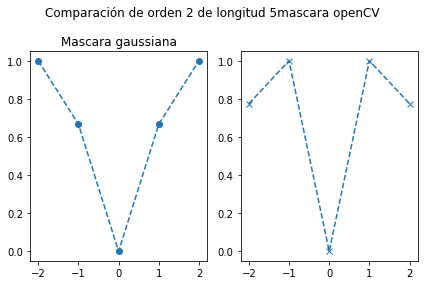

Comparación de orden 2 de longitud 7
El error cuadrático medio es  0.21023552716036767


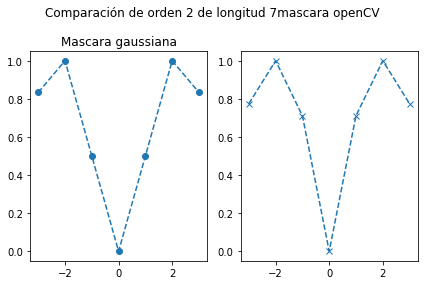

Comparación de orden 2 de longitud 9
El error cuadrático medio es  0.21190159733262084


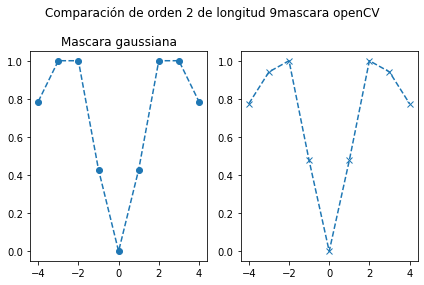

In [5]:
# Script que calcula las diferencias entre las máscaras 

for orden_derivada in [0,1,2]:
    for j in lista_longitudes: 
        print(f'Comparación de orden {orden_derivada} de longitud {j}')
        ComparaMascarasAnalitico(dict_mascaras_cv[orden_derivada][j], dict_mascaras[orden_derivada][j],
        f'Comparación de orden {orden_derivada} de longitud {j}'
        'mascara openCV', 'Mascara gaussiana')



# Conclusión de la comparación  
Un error cuadrático medio de 0.2, teniendo en cuenta que el rango de los nodos normalizado es de $[0,1]$. 
Sin embargo si nos fijamos en las gráficas puede resultar chocante la diferencia. 
Esto se debe a que la métrica de error utilizada no era la idónea y que un sistema mejor hubiera sido estimar 
por la diferencia de áreas con la poligonal que forman y la función Gaussiana. 


# Ejercicio 1B
Calcule las máscaras discretas 1D de longitud 5 y 7 tanto de alisamiento como de derivada de
primer orden generadas a partir de la aproximación binomial de la Gaussiana y la máscara de
derivada de longitud 3.  
Ejecute la función cv2.getDerivKernels(0,1,9).   
Observe los vectores de salida y compárelos con los previamena = cv.getDerivKernels(i,1,ksize=l, normalize = False)[0]te calculados, ¿Qué relación hay? ¿Qué conclusiones
extrae sobre la aproximación de OpenCV al cálculo de las máscaras de derivadas de primer
orden?

## Solución  

### Cálculo de la máscara gaussiana aproximada por una binomial  

Para obtener la aproximación a la gaussiana por una binomial, hemos usado directamente los coeficientes
binomiales, es decir que la  máscara n-ésima $n \in N$  viene dada por 
$( \binom{n}{0}, \binom{n}{1}, ..., \binom{n}{n})$

Esta implementación se realiza en `MascaraBinomialSinNormalizar`. 

Otro enfoque de cálculo hubiera sido el inductivo: 

 La máscara n-ésima puede construirse como  $B_n = B_{n-1} * [1,1]$ y $B_1 = [1]$ (ver celda segunda de código, donde uno de los test para comprobar si la convolución 1D es correcta los calcula). Sin embargo, con el fin de hacer un cálculo más eficiente, se empleará un cálculo directo a través de los coeficientes binomiales. 

 
 A continuación se realizan las distintas implementaciones y comparativas: 

In [17]:
def MascaraBinomialSinNormalizar( longitud:int)-> int: 
    '''Mascara Gaussiana por una binomial a partir de su longitud'''
    n = longitud -1
    return [scipy.special.binom(n, i)  for i in range(longitud)]

### Formas equivalentes de obtenerlas 
n = 4 # número de ejemplos
print('Triánlo de Pascal Calculado de manera recursiva')
initial_array = [1]
mask = [1,1]
print(initial_array)
for i in range(n):
    initial_array = Convolution1D(initial_array, mask)
    print(initial_array)
print('\nCálculo a través de fórmula directa')
for i in range(1,n+2):
    print(MascaraBinomialSinNormalizar(i))




Triánlo de Pascal Calculado de manera recursiva
[1]
[1. 1.]
[1. 2. 1.]
[1. 3. 3. 1.]
[1. 4. 6. 4. 1.]

Cálculo a través de fórmula directa
[1.0]
[1.0, 1.0]
[1.0, 2.0, 1.0]
[1.0, 3.0, 3.0, 1.0]
[1.0, 4.0, 6.0, 4.0, 1.0]


### Cálculo máscara de alisamiento   
Para el cálculo de la máscara se procederá: 
1. A su normalización, para no modificar la intensidad global de la imagen. 

### Cálculo máscara de derivada de longitud 3  
Para obtenerla se derivarán usando convolución las máscaras de alisamiento anteriores, esto es convolucionando por $[1,0,-1]$. 

___1.2.1 Cáculo máscara de alisamemiento normalizadas__
Máscara alisamiento tamaño 5
[0.  0.6 1.  0.6 0. ]


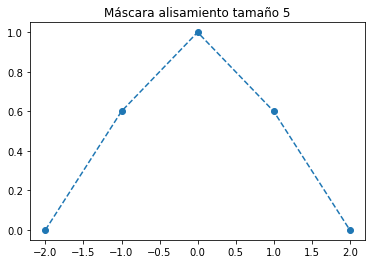

Máscara alisamiento tamaño 7
[0.         0.26315789 0.73684211 1.         0.73684211 0.26315789
 0.        ]


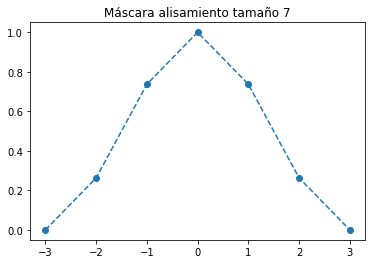


___1.2.1 Derivadas máscara de alisamemiento normalizadas__
La mascara de derivada de longitud 3 a partir de la máscara de alisamiento de longitud 5:
[ 0.  -0.6 -1.   0.   1.   0.6  0. ]


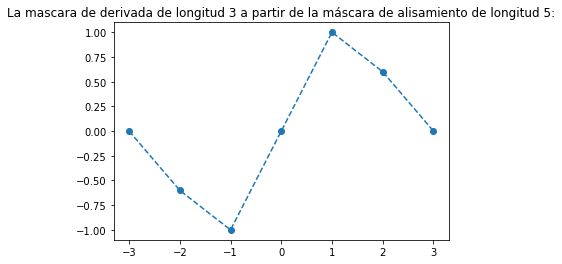

La mascara de derivada de longitud 3 a partir de la máscara de alisamiento de longitud 7:
[ 0.         -0.26315789 -0.73684211 -0.73684211  0.          0.73684211
  0.73684211  0.26315789  0.        ]


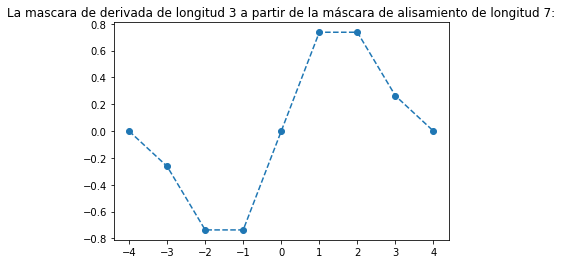

In [18]:
## Calculamos máscara de alisamiento normalizadas
print('___1.2.1 Cáculo máscara de alisamemiento normalizadas__')
LONGITUD = [5,7]
alisamiento = dict()
# Cálculo de la máscara de alisameinto y su visualización
for l in LONGITUD: 
    alisamiento[l]= Normalize(MascaraBinomialSinNormalizar(l))
    titulo = f'Máscara alisamiento tamaño {l}'
    print(titulo)
    print (alisamiento[l])
    MuestreaMascara(alisamiento[l], titulo)
    
## Máscara de derivada , cálculo y derivación
print('\n___1.2.1 Derivadas máscara de alisamemiento normalizadas__')
derivada = dict()
mascara_derivada = [-1, 0, 1] # máscara derivada longitud 3
for l in LONGITUD:
    derivada[l] = Convolution1D(alisamiento[l], mascara_derivada )
    titulo = f'La mascara de derivada de longitud 3 a partir de la máscara de alisamiento de longitud {l}:'
    print(titulo)
    print(derivada[l])
    MuestreaMascara(derivada[l], titulo)
    


A la vista de los resultado y teniendo presente el apartado 1.A, puede pensarse que openCV calcule de esta manera las máscaras; exploraremos esta cuestión en las conclusiones del ejercicio. 

Máscara de alisamiento:  [[ 1.  8. 28. 56. 70. 56. 28.  8.  1.]]
Máscara derivada:  [[ -1.  -6. -14. -14.   0.  14.  14.   6.   1.]]


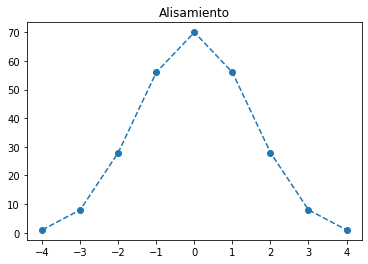

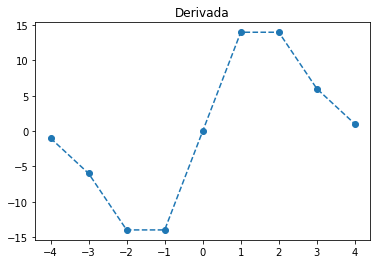

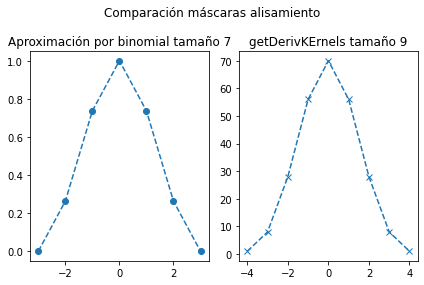

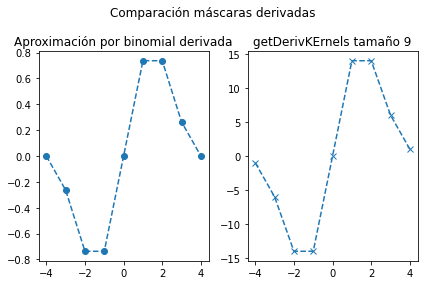

In [23]:
#1.B.2
# Calculamos las máscara y visualización
mascara = cv.getDerivKernels(0,1,9)
print('Máscara de alisamiento: ' , mascara[0].T)
print('Máscara derivada: ' , mascara[1].T)
# Mostramos solas
MuestreaMascara(mascara[0], 'Alisamiento')
MuestreaMascara(mascara[1], 'Derivada')
# Comparativa
MuestraDosMascaras(alisamiento[7], mascara[0], 
    'Comparación máscaras alisamiento',
    'Aproximación por binomial tamaño 7',
    'getDerivKErnels tamaño 9'
    )

MuestraDosMascaras(derivada[7], mascara[1], 
    'Comparación máscaras derivadas',
    'Aproximación por binomial derivada',
    'getDerivKErnels tamaño 9'
    )

La gran similitud visual de las gráficas nos hace cuestionarnos el algoritmo de cálculo que emplea la biblioteca de open cv. 

Consultando la documentación oficial de `getDerivKernels()`
de opencv https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#ga6d6c23f7bd3f5836c31cfae994fc4aea a día 19 de octubre de 2021
, se nos indica que los kernel han sido generados de los Kernel de Sobel; éstos son construibles de manera recursiva como:
Sea $S_n$ la máscara de Sobel de tamaño $2*n+1$, se tiene que:   

$S_n = S_{n-1} * [1,2,1]$ con $S_0 = [1]$
Para la derivada $S_n' = S_n * [-1,0,1] = S_{n-1}' * [1,2,1]$ 

Si recordamos que la aproximación de la máscara gaussiana por la binomial se podía construir de manera recursiva como  $B_n = B_{N-1} * [1,1]$ y $B_1 = [1]$ 
y relacionamos que $[1,1]*[1,1] = [1,2,1]$ se concluye que $S_n = B_{2n}$ de ahí lo que apriori era similitud es ahora igualdad. 

#### Ejemplo

Mostramos a continuación un ejemplo de lo razonado. 
Primero se mostrarán las máscaras calculadas por `getDerivKernel`, cada fila contiene una tupla de dos elemento 
que son la máscara de alisamiento y su derivada.  

En el segundo apartado se calcularán, máscara de Sobel $S$ por el algoritmo recursivo introducido, así como su derivada. 
Esto será útil para constatar que efectivamente son los mismo coeficientes obtenidos con `getDerivKernel. 

Finalmente se imprimirá las máscaras obtenidas por la binomial $B$, así como sus respectivas derivadas. Con esto podremos 
cerciorarnos de que $S_n = B_2n$. 

In [27]:
print('Ejemplificamos el comentario anterios')
casos = 5
print( 'Cálculo por Sobel con getDerivKernels (máscara alisamiento, derivada)')
for i in range(3, 3+5*2,2):
    a,b = cv.getDerivKernels(0,1,i)
    print(a.T, b.T)

print('\nA continuación se mostrará los calculados de manera recursiva.')
print('S hacer referencia a los coeficientes recursivos de Sobel')
print('B a los binomiales')
print('\nConstrucción por recursividad (máscara alisamiento, derivada)')
a = [1,2,1]
b = [-1, 0, 1]
print(a,b)
for i in range(casos-1):
    a = Convolution1D(a,[1,2,1])
    b = Convolution1D(b,[1,2,1])
    print(f"S_{i+1} = {a}, S'_{i+1}= {b}")

a = [1,2,1]
b = [-1, 0, 1]
print(a,b)
for i in range(2*(casos-1)):
    a = Convolution1D(a,[1,1])
    b = Convolution1D(b,[1,1])
    print(f"B_{i+1} = {a} \nB'_{i+1}= {b}")


Ejemplificamos el comentario anterios
Cálculo por Sobel con getDerivKernels (máscara alisamiento, derivada)
[[1. 2. 1.]] [[-1.  0.  1.]]
[[1. 4. 6. 4. 1.]] [[-1. -2.  0.  2.  1.]]
[[ 1.  6. 15. 20. 15.  6.  1.]] [[-1. -4. -5.  0.  5.  4.  1.]]
[[ 1.  8. 28. 56. 70. 56. 28.  8.  1.]] [[ -1.  -6. -14. -14.   0.  14.  14.   6.   1.]]
[[  1.  10.  45. 120. 210. 252. 210. 120.  45.  10.   1.]] [[ -1.  -8. -27. -48. -42.   0.  42.  48.  27.   8.   1.]]

A continuación se mostrará los calculados de manera recursiva.
S hacer referencia a los coeficientes recursivos de Sobel
B a los binomiales

Construcción por recursividad (máscara alisamiento, derivada)
[1, 2, 1] [-1, 0, 1]
S_1 = [1. 4. 6. 4. 1.], S'_1= [-1. -2.  0.  2.  1.]
S_2 = [ 1.  6. 15. 20. 15.  6.  1.], S'_2= [-1. -4. -5.  0.  5.  4.  1.]
S_3 = [ 1.  8. 28. 56. 70. 56. 28.  8.  1.], S'_3= [ -1.  -6. -14. -14.   0.  14.  14.   6.   1.]
S_4 = [  1.  10.  45. 120. 210. 252. 210. 120.  45.  10.   1.], S'_4= [ -1.  -8. -27. -48. -42.   0. 

### Conclusión  

Opencv ha optado por una aproximación más eficiente aunque menos precisa, esto no nos resulta descabellado ya que
no solo el número de cuentas se ve reducido, si no que el cálculo de la gaussiana discretizada ya de por sí era una aproximación. 

# Apartado 1C 
[TEST] Implementar la convolución de una imagen con una máscara 2D de dimensiones inferior a la
imagen 
 - [DONE]suponiendo la propiedad de separabilidad de la máscara 
 - [DONE]e imponiendo bordes reflejados. 
 
 La entrada a la función serán las máscaras 1D descomposición de la máscara 2D.
Comparar su funcionamiento con: 

a.[] La salida de cv2.GaussianBlur para una máscara de entrada Gaussiana con iguales
parámetros en ambos casos. Mostrar ambos resultados.

b.[] Usar las máscaras del punto A para calcular la imágenes derivadas respecto de x e y
de una imagen dada. Mostrar los resultados.


## Sobre la implementación 
Se deberá tener en cuenta que es necesario: 
1. Ampliar bordes de la imagen en el tamaño correcto.
2. Que gestione de manera eficiente si la imagen está en color o escala de grises.

### Diseño del algoritmo
La función solución al problema es `ConvolveSeparable( image, dx, dy, border_type = cv.BORDER_REFLECT)` para su implementación se han implementado dos funciones auxiliares:   

- `Convolve1DNotExpansive( row:np.array , _dx:np.array)-> np.array`: Realiza convolución de un array a una máscara sin añadir paddings.
- `ConvolveSeparableOneChannel(bordered_image, dx, dy):` Realiza la convolución 2D de un canal, está basada en la función anterior.  

### Recursos utilizados  
Para aumentar el borde se utilizará la función `copyMakeBorder` de open cv y además como criterio de creación de padding el argumento que reflecte el margen, este es `BORDER_REFLECT`; también de la biblioteca de open cv.   

Fuente:   
https://www.geeksforgeeks.org/python-opencv-cv2-copymakeborder-method/

Además, para gestionar de un modo eficiente el tratamiento de una imagen a color hemos usado la funciones de cv `merge` y `split` que lo que hacen es unir canales o separarlos en distintos arrays respectivamente. 
Fuente: http://acodigo.blogspot.com/2018/01/opencv-uso-de-las-funciones-split-y.html

Implementación eficiente hecha por Mesejo

La primera como lo has hecho tú
Seguna opción: 

1. Se extiende kernel al resto de la imagen, de esta forma lo pilla todo. 

¿Cómo se calcula la expansión del kernel?
Convolve1D es el que hay que expandir.  

Comentar la diferencia entre correlación cruzada y convolución y que en nuestro caso da igual: nosotros lo haremos de manera purista (180 grados. )

Kernel usado por Gaussian Kernel [0.27406862 0.45186276 0.27406862]


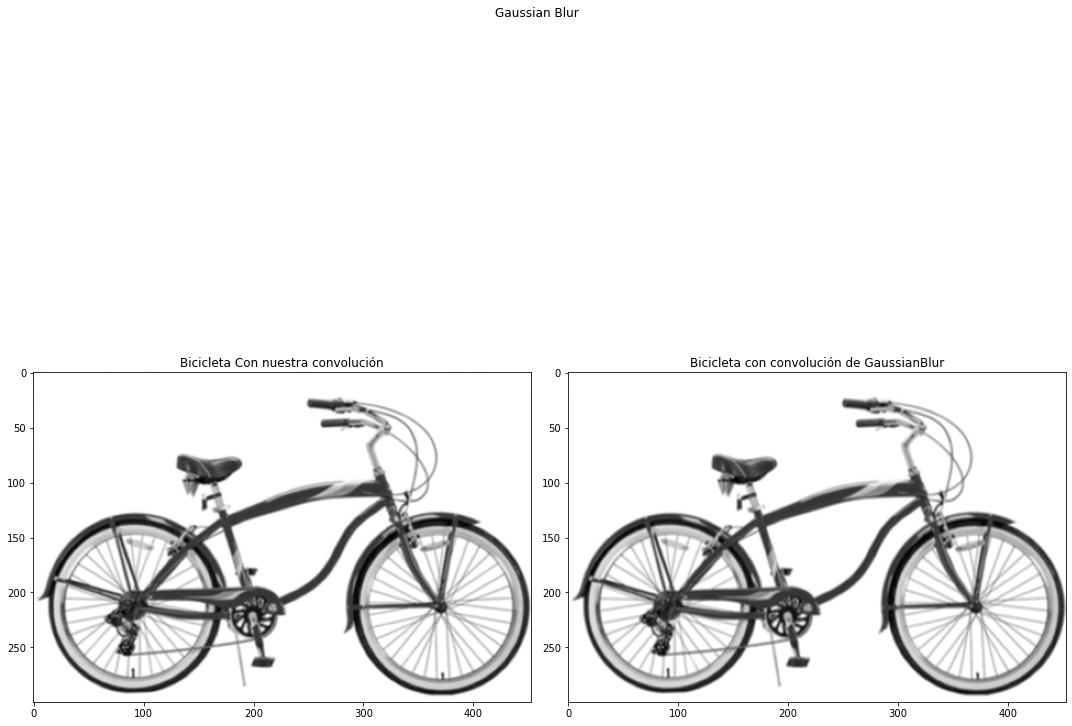

Error cuadrático de las imagenes 2.0075917824880944
Vamos a restal los píxeles de los imágnees para ver la diferecia


<Figure size 432x288 with 0 Axes>

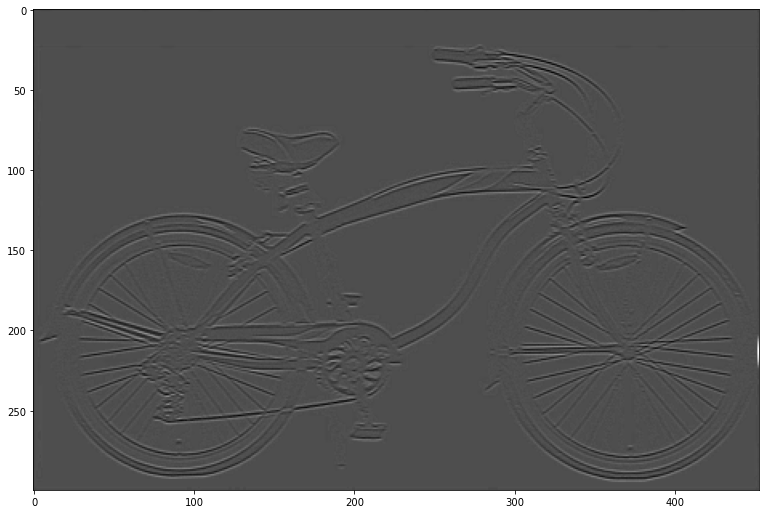

Como vemos todos son en negro,lo que indica que todos los píxeles son 0


In [10]:
# Versión 1
# Convolución 1D
def Convolve1DNotExpansive( row:np.array , _dx:np.array)-> np.array:
    ''' Convolution without adding padding'''
    dx = _dx[::-1]
    mask_len = len(dx)
    convolved = [ 
        np.dot( row[i:mask_len+i], dx)
        for i in range( len(row)-mask_len+1)
    ]
    return np.array(convolved)
    
# Implementación de convolución 2D en un canal
def ConvolveSeparableOneChannel(bordered_image, dx, dy):
    '''Suponemos imagen monobanda, 
        dx, dy máscaras en respectivos ejes en los que aplicar convolución 
    '''
    # convolve horizontal
    horizontal_convolved = np.array([Convolve1DNotExpansive(row, dx) for row in bordered_image])
    #convolve vertical  
    output = [Convolve1DNotExpansive(column, dy) for column in horizontal_convolved.T]
    return np.array(output).T

# # Implementación de convolución 2D para imagen genérica  
def ConvolveSeparable( image, dx, dy, border_type = cv.BORDER_REFLECT): 
    '''
    Recibe imagen realiza una convolución en 2D 
    '''
    # Calculamos el tamaño de los borderes
    x_padding = int( (len(dx) - 1) /2)
    y_padding =  int( (len(dy) - 1) /2)
    # padding order : top, bottom, left, right 
    bordered_image = cv.copyMakeBorder(image, y_padding, y_padding, x_padding, x_padding,  border_type)
    # controlamos que sea monobanda o tribanda, separando los canales
    if(IsGreyScale(image)):
        out_img = ConvolveSeparableOneChannel(bordered_image, dx, dy)
    else:
        #separamos canales
        channels = cv.split(bordered_image)
        out_img = cv.merge(
            [
                ConvolveSeparableOneChannel(one_channel_image, dx, dy)
                for one_channel_image in channels
            ]
        )
    return out_img

### Realización del ejercicio 
ksize = 3
sigma = 1.0
GK3 = cv.getGaussianKernel(ksize, sigma).T[0]
print('Kernel usado por Gaussian Kernel', GK3)

bici_propia = ConvolveSeparable(img_bicycle_grey, GK3, GK3)
bici_cv = cv.GaussianBlur(img_bicycle_grey, (ksize,ksize), sigma, sigma, cv.BORDER_REFLECT)
# curiosamente con el borde  por defecto son casi idénticas: hay que diferenciarlas
#PrintOneImage(bici_propia, 'Bicicleta Con nuestra convolución')
#PrintOneImage(bici_cv, 'Bicicleta con convolución de GaussianBlur')
PrintTwoImages([bici_propia, bici_cv], 
['Bicicleta Con nuestra convolución', 'Bicicleta con convolución de GaussianBlur'], 'Gaussian Blur')
# Todo abstraer a dos imágenes 
print('Error cuadrático de las imagenes',  MSE(bici_cv, bici_propia))
diferenciaImagenes = bici_propia - bici_cv
print('Vamos a restal los píxeles de los imágnees para ver la diferecia')
PrintOneImage(diferenciaImagenes)
print('Como vemos todos son en negro,lo que indica que todos los píxeles son 0')

# Análisis de los resultados   
Los cálculos son prácticamente idénticos, salvo una pequeña diferencia que coincide en los bordes de la imagen, como es de esperar. 
Pregunta que hacerse: 
¿Por qué con el de por defecto no hay tanta discrepancia? 

Convolve in row
Test 1, should give [-2]
[-2 -2 -2]
Test  ConvolveSeparableOneChannel
[[-1]]


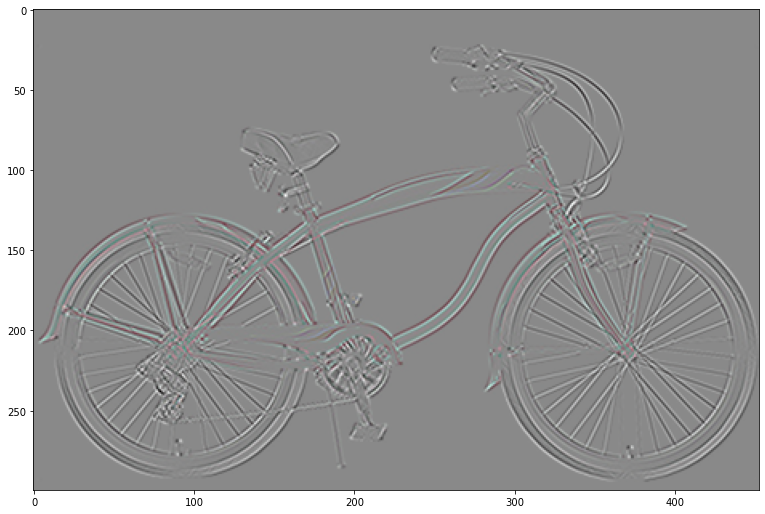

In [11]:
## Test convolución 2D de un canal
if(TESTS_ON):
    input = np.array([
        [1,2,3],
        [4,5,6],
        [7,8,8]
    ])
    dx_long = [1,2,3,4,5]
    dx = [-1,0,1]
    dy = [-1,0,1]

    print('Convolve in row')
    print('Test 1, should give [-2]')
    test_1 = Convolve1DNotExpansive(dx_long, dx)
    print(test_1)


    print('Test  ConvolveSeparableOneChannel')
    test1 = ConvolveSeparableOneChannel(input, dx, dy)
    print(test1)

    bordered_img = ConvolveSeparable(img_bicycle, dx, dy)

    PrintOneImage(bordered_img)


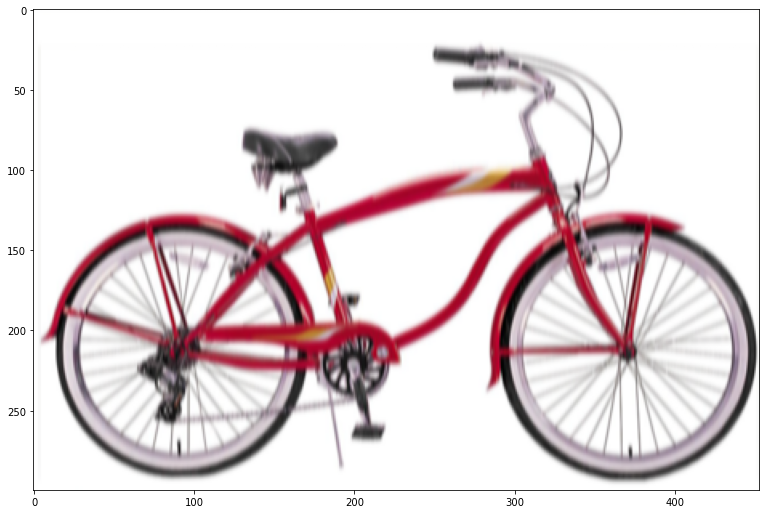

In [12]:
# 1C Gaussian Blur
# Documentación: https://docs.opencv.org/4.5.3/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html

dst = cv.GaussianBlur( img_bicycle, (1,9), 0)
PrintOneImage(dst)


# Ejercicio 1D   


[]Usar las implementaciones del punto A para calcular máscaras normalizadas de la Laplaciana
de una Gaussiana.

 Mostrar ejemplos de funcionamiento usando bordes reflejados y dos
valores de sigma (1 y 3) con alguna imagen. Compare los resultados con la salida dada por
OpenCV con la función Laplaciana. 

[]Discuta pros y contras.


### Comentarios de Mesejo
Si rango de la matriz 1 entonces separable, en caso contrario no

Qué es la log y cómo se utiliza y mirar la diapositiva

## Solución 

Partimos del desarrollo matemático (operador laplaciano + propiedad asociativa y distributiva de la laplaciana)

Se llega a que la Laplaciana de una Gaussiana es  (fórmula). 

La derivada parcial será 

$$\frac{ partial G(x,y)}{ partial x} = G^'_$$

## Calcular la máscara discretizada  

Eso se hará gracias al ejercicio 1A

Como además no se nos ha provisto del tamaño de la máscara, este será deducido de la regla comentada en el apartado 1A 

El tamaño del array unidimensional de nuestra máscara es $T = 2 \lceil3 \sigma \rceil + 1$ calculado a traves de la función `DeductSizeFromSigma`

Kernels 1D
Máscara Gaussiana [0.00443305 0.05400558 0.24203623 0.39905028 0.24203623 0.05400558
 0.00443305]


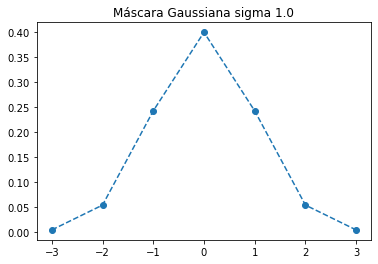

Mascara de la seguna gaussiana [-0.06665398 -0.54134113 -1.21306132  0.          1.21306132  0.54134113
  0.06665398]


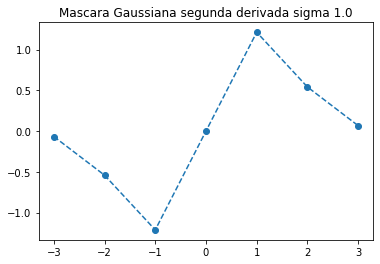

Máscara 2D asociada


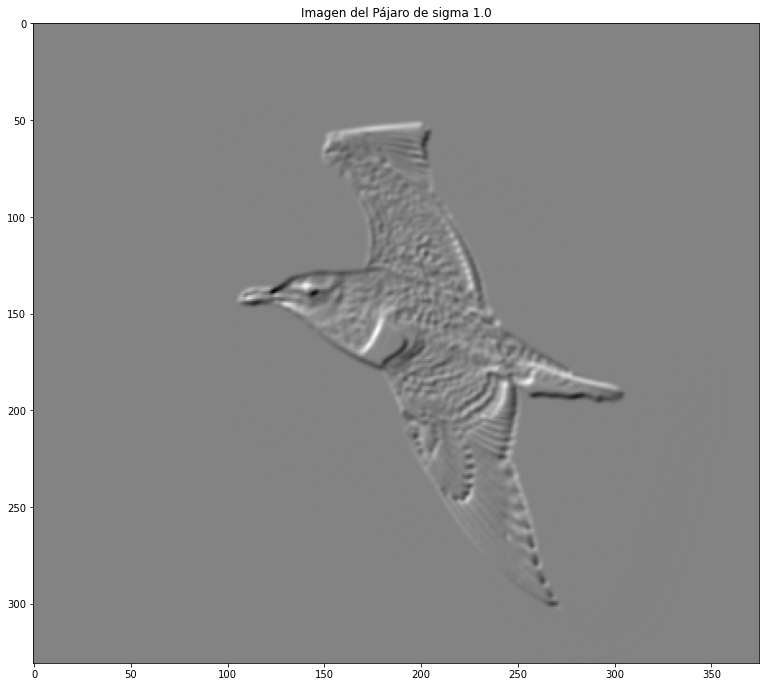

Kernels 1D
Máscara Gaussiana [0.00147945 0.00380424 0.00875346 0.01802341 0.03320773 0.05475029
 0.08077532 0.106639   0.12597909 0.133176   0.12597909 0.106639
 0.08077532 0.05475029 0.03320773 0.01802341 0.00875346 0.00380424
 0.00147945]


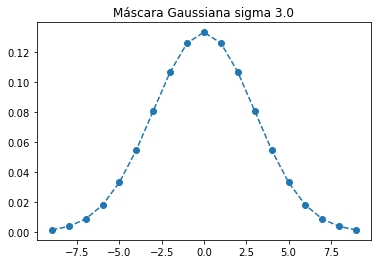

Mascara de la seguna gaussiana [-0.19996194 -0.45704801 -0.9201994  -1.6240234  -2.49352209 -3.28889832
 -3.63918396 -3.20294961 -1.89191894  0.          1.89191894  3.20294961
  3.63918396  3.28889832  2.49352209  1.6240234   0.9201994   0.45704801
  0.19996194]


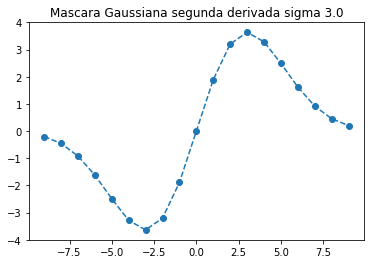

Máscara 2D asociada


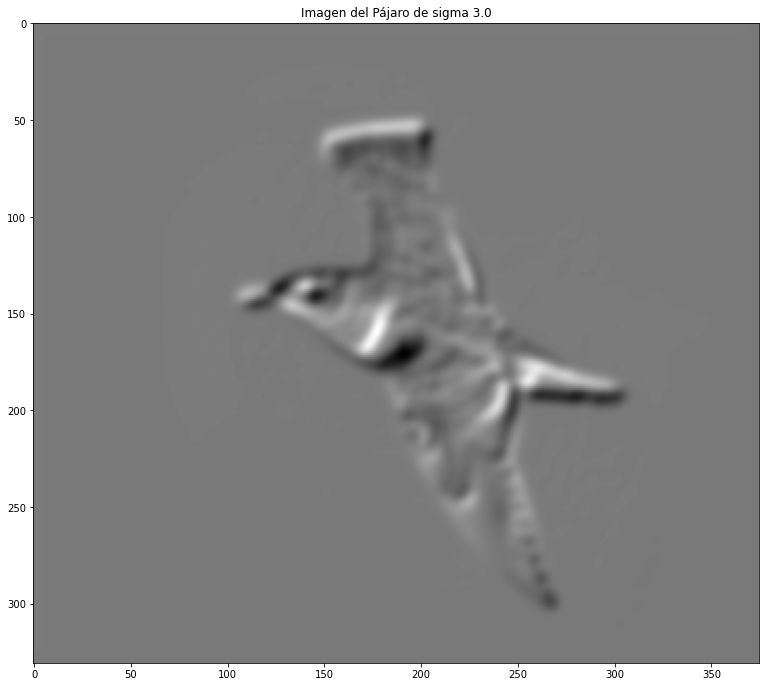

In [13]:
# Ejercicio 1D

# assets 

def SeparableMaskToOne(f:np.array,g:np.array)-> np.array :
    return np.dot(g.T, f)

## Solution 
SIZE = 3 # El tamaño debe de ser calculado a partir de la relación con los sigmas 
sigma = 1.0

def LaplacianOfGaussian(img, sigma:float = None, size: int = None):
    ''' Calcula el laplaciano de una gaussiana para una imagen img de sigam sigma'''
    mascara_gaussiana = MascarasGaussianasGeneral(0,sigma, size)
    mascara_segunda_derivada = MascarasGaussianasGeneral(1,sigma, size)

    dxx = ConvolveSeparable(img, mascara_segunda_derivada, mascara_gaussiana)
    dyy = ConvolveSeparable(img, mascara_gaussiana, mascara_segunda_derivada)

    imagen_resultante = sigma**2 * (dxx + dyy)
    return imagen_resultante

def Info( sigma, size): 
    # Mostramos las máscaras calculadas
    print( 'Kernels 1D')
    
    mascara_gaussiana = MascarasGaussianasGeneral(0,sigma, size)
    mascara_primera_derivada = MascarasGaussianasGeneral(1,sigma, size)
    print('Máscara Gaussiana', mascara_gaussiana)
    MuestreaMascara(mascara_gaussiana, f'Máscara Gaussiana sigma {sigma}')
    print('Mascara de la seguna gaussiana', mascara_primera_derivada)
    MuestreaMascara(mascara_primera_derivada, f'Mascara Gaussiana segunda derivada sigma {sigma}')
    print('Máscara 2D asociada')
    # TODO Calcular máscara 2D asociada 
    mascara2D = SeparableMaskToOne(mascara_gaussiana, mascara_primera_derivada)

## Resolución del ejercicio 
SIGMAS = [1.0, 3.0]
IMAGENES = [img_bird_grey]
TITULOS_IMAGENES = ['Pájaro']
for sigma in SIGMAS:
    size = DeductSizeTFromSigma(sigma)
    for i, imagen in enumerate(IMAGENES):
        titulo = f'Imagen del {TITULOS_IMAGENES[i]} de sigma {sigma}'
        # Información adicional sobre los cálculos y resultados
        Info(sigma, size)
        # Cálculo de la Gaussiana
        imagen_resultante = LaplacianOfGaussian(imagen, sigma, size)
        PrintOneImage(imagen_resultante, title= titulo)

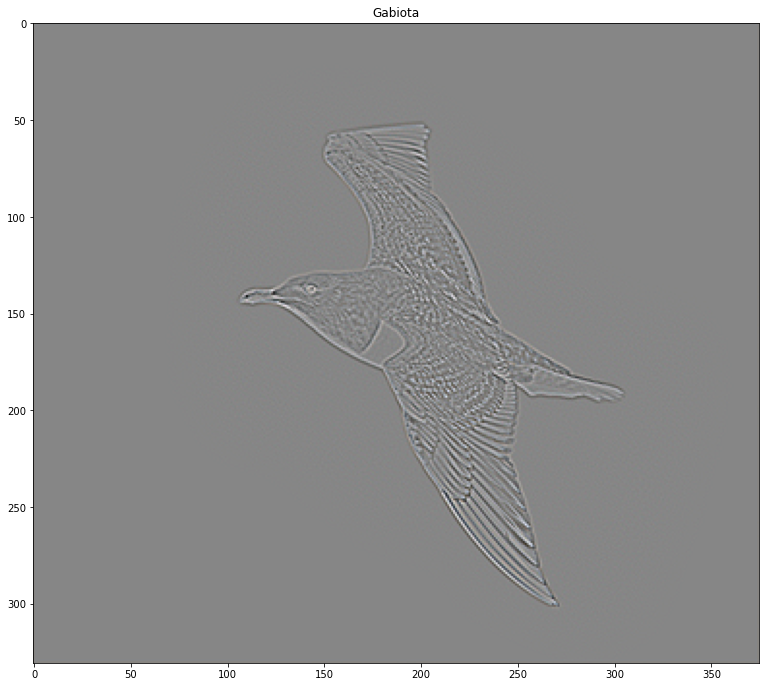

In [14]:
# Open CV comparation
# Source: https://docs.opencv.org/4.5.3/d5/db5/tutorial_laplace_operator.html

# Declare the variables we are going to use
ddepth = cv.CV_16S  # What is this
kernel_size = 3
dst = cv.Laplacian( img_bird, ddepth, kernel_size)
PrintOneImage(dst, 'Gabiota')

# Conclusiones   

¿Por qué una sale más borrosa que otra? ¿Qué ventajas ofrece una frente a otra?


# TODO dibuja en 3D
# Fuente: https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html

'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Ejercicio 2 

2.- IMPLEMENTAR funciones para las siguientes tareas (4 puntos). Usar funciones implementadas en el ejercicio 1. No se permite el uso de funciones específicas de OpenCV.

(1.5 puntos) 
[] Una función que genere una representación en pirámide Gaussiana de 4 niveles de una imagen. 
[]Mostrar ejemplos de funcionamiento usando bordes replicados o reflejados, y justificar la elección de los parámetros.
[] Mostrar todos los niveles de la pirámide en una única imagen. 
[]Comparar los resultados con la pirámide obtenida usando las funciones OpenCV.

Rango de valores de open las imágenes 
0 255.0


/tmp/ipykernel_3151/2193434036.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(piramide)


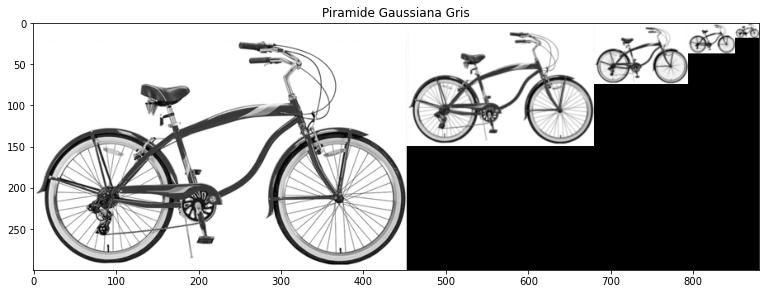

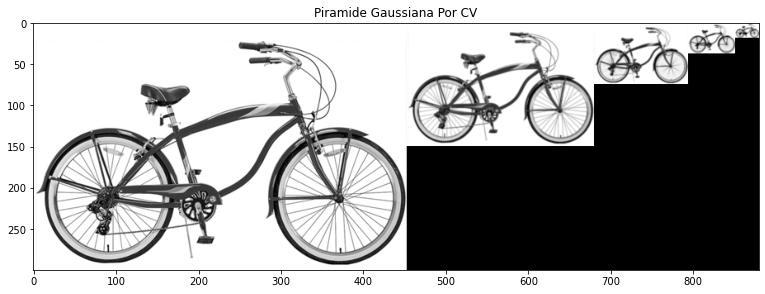

No hay diferencias apreciables, procederemos a compararlas nivel por nivel


NameError: name 'Normaliza' is not defined

In [15]:
def PiramideGaussiana( 
    imagen: np.array, sigma : float, 
    tipo_borde,  niveles: int = 4
): 
    # Calculamos kernel 
    kernel = MascarasGaussianasGeneral(orden=0, sigma = sigma)
    piramide = [imagen]
    for i in range(niveles):
        piramide.append( 
            ConvolveSeparable(piramide[-1], kernel, kernel, tipo_borde)[::2, ::2]
            )
    return np.array(piramide) 

## Implementación pirámide Gaussiana CV
# Con el fin de comparar 
def CVPiramideGaussiana(imagen, niveles=4, tipo_borde=cv.BORDER_REPLICATE):
    """
    Funcion para calcular la piramide gaussiana con opencv. La usaremos para
    comparar soluciones
    """
    solucion = [imagen]

    # para cada nivel, añadimos lo devuelto por pyrDown con el nivel anterior
    for i in range(niveles):
        solucion.append(cv.pyrDown(solucion[-1], borderType=tipo_borde) )

    return solucion

# Test 
bordes_reflejados = cv.BORDER_REFLECT
border_replicados = cv.BORDER_REPLICATE

# Mi función 
piramide_gris  = PiramideGaussiana(img_bicycle_grey, sigma=1.0, 
tipo_borde= bordes_reflejados, niveles=4)
# Función CV
piramide_gris_cv =  CVPiramideGaussiana(img_bicycle_grey, tipo_borde=bordes_reflejados, niveles=4) 
# Comparativa open CV

# Valores que toma la imagen 
print( 'Rango de valores de open las imágenes ')
print(np.min(piramide_gris[0]), np.max(piramide_gris[1]))

PrintMultiplesImagenes(piramide_gris, 'Piramide Gaussiana Gris')
PrintMultiplesImagenes(piramide_gris_cv, 'Piramide Gaussiana Por CV')

print('No hay diferencias apreciables, procederemos a compararlas nivel por nivel')

for i,(img1,img2) in enumerate(zip(piramide_gris, piramide_gris_cv)):
    ComparaImagenes(img1, img2, f'Comparativa nivel {i}')
# Comparación imágenes por imágenes 

'''
piramide_color  = PiramideGaussiana(img_bicycle, sigma=1.0, 
tipo_borde= bordes_reflejados, niveles=4)
'''


### Análisis de los resultados   

Teniendo presente que el rango de valores que comprenden las imágenes son de 

/tmp/ipykernel_2936/2193434036.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(piramide)


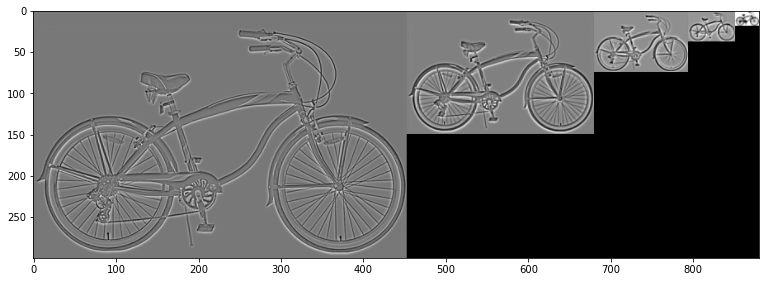

'\nfor i in piramide_laplaciana_bicicleta: \n    PrintOneImage(i)\n'

In [ ]:
# Pirámide laplaciana 

def PiramideLaplaciana(imagen, sigma = 1.0,
 niveles=5, 
 tipo_borde = cv.BORDER_REPLICATE ):
    '''Devuelve Pirámide Laplaciana de la imagen y parámetros indicados'''
    piramide_gaussina = PiramideGaussiana(imagen, sigma, niveles=niveles, tipo_borde=tipo_borde)
    piramide_laplaciana = []
    for i in range(niveles):
        anchura = piramide_gaussina[i].shape[1]
        altura = piramide_gaussina[i].shape[0]

        img_gaussiana_reescalada =  cv.resize(
            src = piramide_gaussina[i+1], dsize = (anchura, altura)
        )
        #diferencia  y normalizamos
        laplaciana = Normalize(
            piramide_gaussina[i] -img_gaussiana_reescalada
        )
        piramide_laplaciana.append(laplaciana)
    # Añadimos extremo de la pirámide Gaussiana
    piramide_laplaciana.append(piramide_gaussina[-1])
    
    return piramide_laplaciana
        
         

piramide_laplaciana_bicicleta  = PiramideLaplaciana(img_bicycle_grey, sigma=1.0, 
tipo_borde= bordes_reflejados, niveles=4)
PrintMultiplesImagenes(piramide_laplaciana_bicicleta)
'''
for i in piramide_laplaciana_bicicleta: 
    PrintOneImage(i)
'''


# Todo 

Reflexión sobre los colores 
Reconstruirla 
Mirar lo del min max de la función normaliza 


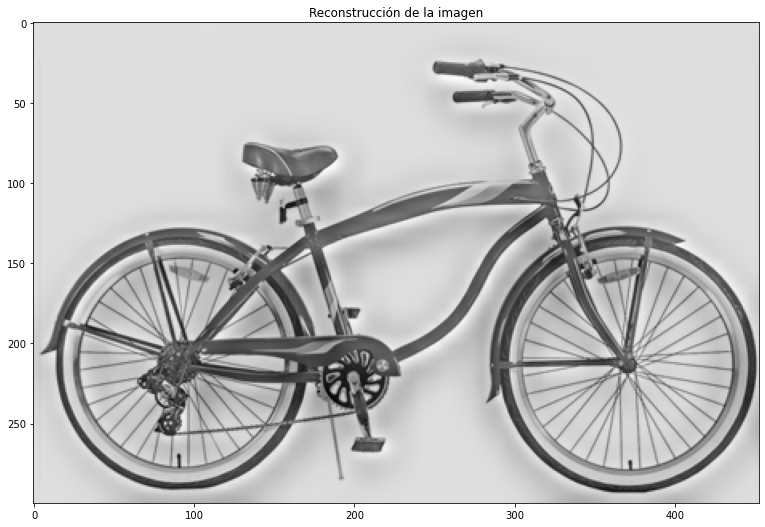

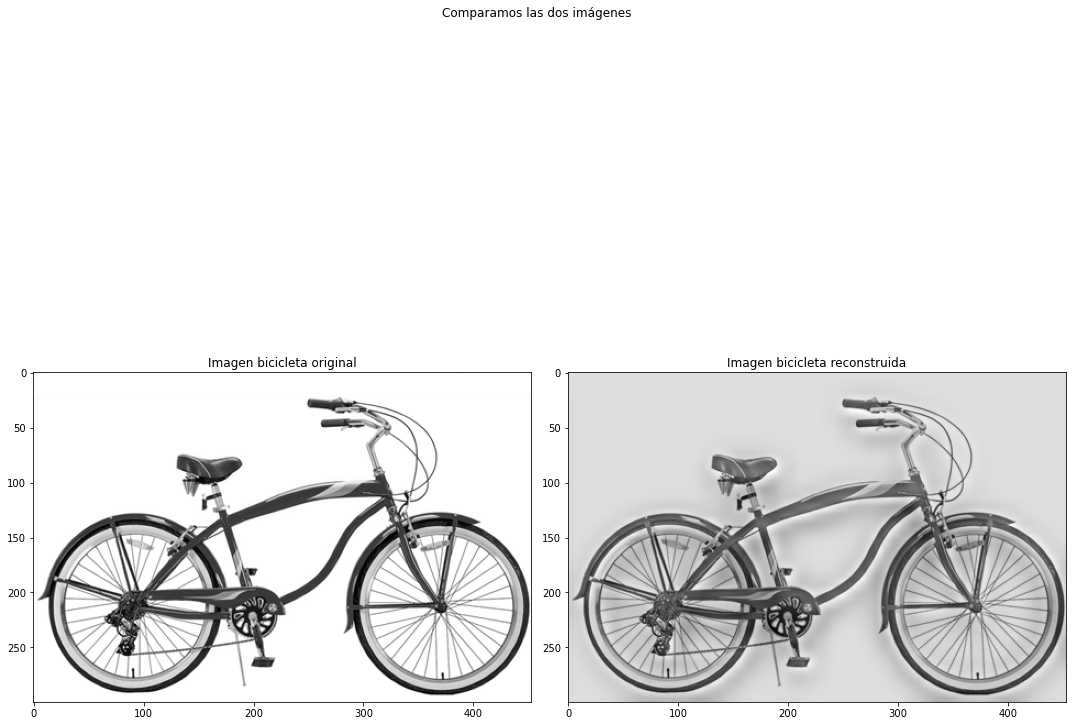


Comparación de las imágenes
Error cuadrático de las imagenes 0.023502487628492164
Vamos a restar los píxeles de los imágenes para ver la diferencias entre ellas
La imagen normalizada resultante es: 


<Figure size 432x288 with 0 Axes>

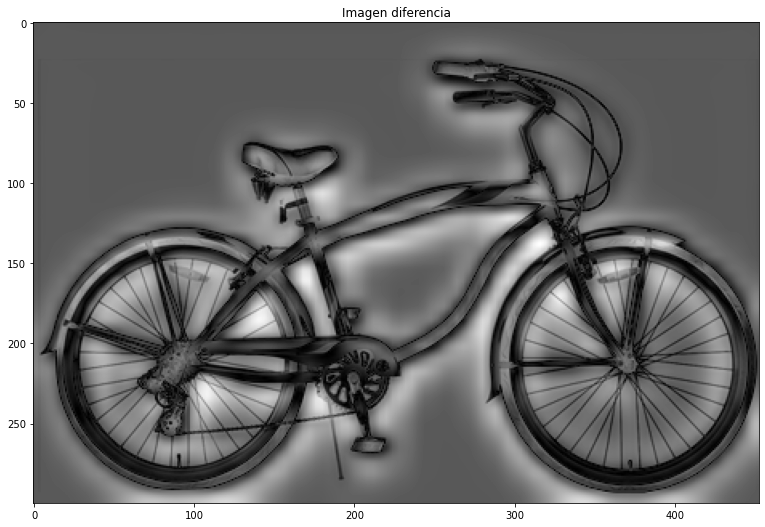

Recuerde de que las zonas más oscuras significan una diferencia pequeña, siendo el color negro la igualdad


In [ ]:

# Ejercio 2 

## Reconstruir la Laplaciana  

def ReconstruirLaplaciana( piramide_laplaciana ): 
    imagen_reconstruida = piramide_laplaciana[-1]

    for i, imagen in enumerate(piramide_laplaciana[::-1][1:]):
        anchura = imagen.shape[1]
        altura = imagen.shape[0]

        img_reescalada =  cv.resize(
            src = imagen_reconstruida, dsize = (anchura, altura)
        )
        #diferencia  y normalizamos
        imagen_reconstruida= Normalize(
            imagen + img_reescalada
        )

    return imagen_reconstruida
    

# Prueba 
imagen_reconstruida_bicicleta = ReconstruirLaplaciana(piramide_laplaciana_bicicleta)
PrintOneImage(imagen_reconstruida_bicicleta, title='Reconstrucción de la imagen')

## Todo según mesejo la imagen Laplaciana son para cifro

PrintTwoImages([img_bicycle_grey,imagen_reconstruida_bicicleta], 
['Imagen bicicleta original', 'Imagen bicicleta reconstruida'], 'Comparamos las dos imágenes')

ComparaImagenes(img_bicycle_grey,imagen_reconstruida_bicicleta, 'Comparación de las imágenes')
